In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [2]:
def block_based_warping(image, block_size, key, maximum_pixel_offset):
    # Create regular grid of blocks
    rows, cols = image.shape[:2]
    block_rows, block_cols = rows // block_size, cols // block_size

    # Initialize the warped output image
    warped_image = np.zeros_like(image)

    # Set random seed based on the key
    np.random.seed(key)

    for block_row in range(block_rows):
        for block_col in range(block_cols):
            # Get block indices
            start_row = block_row * block_size
            end_row = start_row + block_size
            start_col = block_col * block_size
            end_col = start_col + block_size

            # Calculate random pixel offsets
            row_offset = np.random.randint(-maximum_pixel_offset, maximum_pixel_offset)
            col_offset = np.random.randint(-maximum_pixel_offset, maximum_pixel_offset)

            # Calculate the warped grid for the block
            warped_start_row = max(0, start_row + row_offset)
            warped_end_row = min(rows, end_row + row_offset)
            warped_start_col = max(0, start_col + col_offset)
            warped_end_col = min(cols, end_col + col_offset)

            # Perform spline interpolation to warp the block
            warped_block = cv2.resize(image[warped_start_row:warped_end_row, warped_start_col:warped_end_col],
                                      (block_size, block_size))

            # Assign the warped block to the corresponding region in the output image
            warped_image[start_row:end_row, start_col:end_col] = warped_block

    # Apply Gaussian blur to smoothen the output image
    kernel_size = (15, 15)  # Increase the kernel size for more smoothing
    smoothed_image = cv2.GaussianBlur(warped_image, kernel_size, 0)

    return smoothed_image

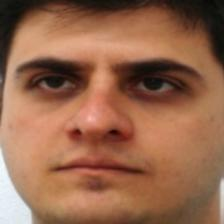

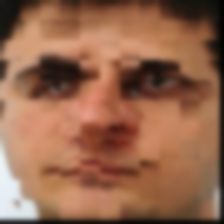

In [4]:
# Setting the input parameters
image = cv2.imread('/content/1-_0_0.jpg', cv2.IMREAD_COLOR)
block_size = 20
key = 1234
maximum_pixel_offset = 9

# Calling the warping function
warped_image = block_based_warping(image, block_size, key, maximum_pixel_offset)

# Displaying the original and warped images
cv2_imshow(image)
cv2_imshow(warped_image)